<a href="https://colab.research.google.com/github/DonRoboto/AprendizajeAutomatizado/blob/master/Tarea3/Tarea3_ej1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 1 
<br>
Inciso a)

In [0]:
import numpy as np

Para la expansión polinomial programamos la siguiente función recursiva, que multiplica los coeficientes, omitiendo las interacciones y agregando el coeficiente para el sesgo

In [0]:
def expansionPolinomial(grado, row):
    if grado==1:
        if 1 not in row:
            result = row.insert(0,1)
        result=row
        return result
    elif grado > 1:
        aux_result=[]
        result = expansionPolinomial(grado-1, row)
        aux_result.extend(result)
        for item in row:
            for p_item in result:
                res=item*p_item
                if (res not in result) and (res not in aux_result):
                    aux_result.append(res)
    return aux_result

Hacemos una prueba para un caso sencillo de dos coeficientes

In [3]:
d = 3
array_row = [[2, 3],
       [4, 5],
       [7, 8]]

A = expansionPolinomial(d, array_row[0])
for i in range(1, len(array_row)):
    newrow = expansionPolinomial(d, array_row[i])
    A = np.vstack([A, newrow])

print(A)

[[  1   2   3   4   6   9   8  12  18  27]
 [  1   4   5  16  20  25  64  80 100 125]
 [  1   7   8  49  56  64 343 392 448 512]]


Comparamos este resultado con el que obtendríamos utilizando las librerias de sklearn, 

In [4]:
from sklearn.preprocessing import PolynomialFeatures
d = 3
row =  [[2, 3],
       [3, 5],
       [7, 8]]
pf = PolynomialFeatures(degree=d, interaction_only=False, include_bias=True).fit_transform(row)
print(pf)

[[  1.   2.   3.   4.   6.   9.   8.  12.  18.  27.]
 [  1.   3.   5.   9.  15.  25.  27.  45.  75. 125.]
 [  1.   7.   8.  49.  56.  64. 343. 392. 448. 512.]]


Podemos observar que el número de coeficientes se reduce drásticamente si consideramos únicamente las interacciones

In [5]:
pf = PolynomialFeatures(degree=d, interaction_only=True, include_bias=True).fit_transform(row)
print(pf)

[[ 1.  2.  3.  6.]
 [ 1.  3.  5. 15.]
 [ 1.  7.  8. 56.]]


Definimos las siguientes funciones para calcular la regresión lineal multivariada con el método del descenso del gradiente

In [0]:
def inicia_parametros(num_features):    
    coef = np.ones(num_features)
    b=0
    return coef,b

def funcion_costo(y, y_hat):
    N = y.shape[0]
    diffs = y_hat - y
    J = np.sum(diffs**2) * (1/N)
    return J, diffs   

def descenso_gradiente(coef,b,dw,db,lr):
    coef = coef - lr * dw
    b = b - lr * db  
    return coef, b

def forward_propagation(X, coef, b):
    y_hat = np.dot(X,coef)+b
    return y_hat
    
def back_propagation(X,diffs):
    N = X.shape[0]    
    xs_transposed = X.transpose()
    dw = np.dot(xs_transposed, diffs) / N
    db = np.sum(diffs) / N    
    return dw, db

Función que por cada iteración ajusta los valores de los coeficientes hasta minimizar la función de costo

In [0]:
def fit_model(xs, ys, lr, iterations):
    num_examples, num_features = np.shape(xs)
    coef,b = inicia_parametros(num_features)

    for i in range(iterations):
        y_hat = forward_propagation(xs, coef, b)
        J, diffs = funcion_costo(ys, y_hat) 

        dw, db = back_propagation(xs, diffs)
        coef,b = descenso_gradiente(coef, b, dw, db, lr)
    return coef, b

Cargamos los datos de los precios de casas y normalizamos los valores

In [0]:
import pandas as pd

ds = pd.read_csv("https://raw.githubusercontent.com/DonRoboto/AprendizajeAutomatizado/master/Tarea3/housing.data",header=None, delimiter=r"\s+")

#normalizar los datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(ds)
dataset = pd.DataFrame(scaled_df)

Separamos datos de entrenamiento (80%) y validación (20%) para una expansión de grado 1

In [0]:
num_examples, num_features = np.shape(dataset)
num_features = num_features -1
particion = int(round(num_examples*0.8))
grado_polinomio=1

g=[]
err_train=[]
err_test=[]

X_train = dataset.iloc[0:particion,:-1].to_numpy()
X_train_exp_1 = PolynomialFeatures(degree=grado_polinomio, interaction_only=True, include_bias=False).fit_transform(X_train)
y_train = dataset.iloc[0:particion,num_features].to_numpy()

X_test = dataset.iloc[particion:num_examples,:-1].to_numpy()
X_test_exp_1 = PolynomialFeatures(degree=grado_polinomio, interaction_only=True, include_bias=False).fit_transform(X_test)
y_test = dataset.iloc[particion:num_examples,num_features].to_numpy()


Entrenamos un primer modelo

In [0]:
lr = 0.01
iteraciones = 10000
coef, b = fit_model(X_train_exp_1, y_train, lr,  iteraciones)

Evaluamos para este modelo tanto para el conjunto de entrenamiento como para el conjunto de validación

In [11]:
y_hat_train_1 = forward_propagation(X_train_exp_1, coef, b)
J_train, diffs_train =funcion_costo(y_train, y_hat_train_1)

y_hat_test_1 = forward_propagation(X_test_exp_1, coef, b)
J_test, diffs_test =funcion_costo(y_test, y_hat_test_1)

g.append(grado_polinomio)
err_train.append(J_train)
err_test.append(J_test)

print("Expansión de grado:{0} Función de Costo en Entrenamiento:{1}".format(grado_polinomio, J_train))
print("Expansión de grado:{0} Función de Costo en Validación:{1}".format(grado_polinomio, J_test))

Expansión de grado:1 Función de Costo en Entrenamiento:0.01955044721674139
Expansión de grado:1 Función de Costo en Validación:0.028063757020445536


Expandimos el polinomio a un grado 3

In [0]:
grado_polinomio=3
X_train_exp_3 = PolynomialFeatures(degree=grado_polinomio, interaction_only=True, include_bias=False).fit_transform(X_train)

X_test_exp_3 = PolynomialFeatures(degree=grado_polinomio, interaction_only=True, include_bias=False).fit_transform(X_test)

Entrenamos y evaluamos

In [0]:
coef, b = fit_model(X_train_exp_3, y_train, lr,  iteraciones)

In [14]:
y_hat_train_3 = forward_propagation(X_train_exp_3, coef, b)
J_train, diffs_train =funcion_costo(y_train, y_hat_train_3)

y_hat_test_3 = forward_propagation(X_test_exp_3, coef, b)
J_test, diffs_test =funcion_costo(y_test, y_hat_test_3)

g.append(grado_polinomio)
err_train.append(J_train)
err_test.append(J_test)

print("Expansión de grado:{0} Función de Costo en Entrenamiento:{1}".format(grado_polinomio, J_train))
print("Expansión de grado:{0} Función de Costo en Validación:{1}".format(grado_polinomio, J_test))

Expansión de grado:3 Función de Costo en Entrenamiento:0.07391883406710546
Expansión de grado:3 Función de Costo en Validación:0.5814622307599191


Expansión del polinomio a grado 5

In [0]:
grado_polinomio=5
X_train_exp_5 = PolynomialFeatures(degree=grado_polinomio, interaction_only=True, include_bias=False).fit_transform(X_train)

X_test_exp_5 = PolynomialFeatures(degree=grado_polinomio, interaction_only=True, include_bias=False).fit_transform(X_test)

Entrenamos y evaluamos

In [0]:
coef, b = fit_model(X_train_exp_5, y_train, lr,  iteraciones)

In [17]:
y_hat_train_5 = forward_propagation(X_train_exp_5, coef, b)

J_train, diffs_train =funcion_costo(y_train, y_hat_train_5)

y_hat_test_5 = forward_propagation(X_test_exp_5, coef, b)
J_test, diffs_test =funcion_costo(y_test, y_hat_test_5)

g.append(grado_polinomio)
err_train.append(J_train)
err_test.append(J_test)

print("Expansión de grado:{0} Función de Costo en Entrenamiento:{1}".format(grado_polinomio, J_train))
print("Expansión de grado:{0} Función de Costo en Validación:{1}".format(grado_polinomio, J_test))

Expansión de grado:5 Función de Costo en Entrenamiento:0.39392414959093014
Expansión de grado:5 Función de Costo en Validación:5.980710395003662


Expandimos el polinomio a grado 10

In [0]:
grado_polinomio=10
X_train_exp_10 = PolynomialFeatures(degree=grado_polinomio, interaction_only=True, include_bias=False).fit_transform(X_train)

X_test_exp_10 = PolynomialFeatures(degree=grado_polinomio, interaction_only=True, include_bias=False).fit_transform(X_test)

Entrenamos y evaluamos

In [0]:
coef, b = fit_model(X_train_exp_10, y_train, lr,  iteraciones)

In [20]:
y_hat_train_10 = forward_propagation(X_train_exp_10, coef, b)
J_train, diffs_train =funcion_costo(y_train, y_hat_train_10)

y_hat_test_10 = forward_propagation(X_test_exp_10, coef, b)
J_test, diffs_test =funcion_costo(y_test, y_hat_test_10)

g.append(grado_polinomio)
err_train.append(J_train)
err_test.append(J_test)

print("Expansión de grado:{0} Función de Costo en Entrenamiento:{1}".format(grado_polinomio, J_train))
print("Expansión de grado:{0} Función de Costo en Validación:{1}".format(grado_polinomio, J_test))

Expansión de grado:10 Función de Costo en Entrenamiento:0.9345331448397496
Expansión de grado:10 Función de Costo en Validación:12.237112012474963


Graficando estos resultados

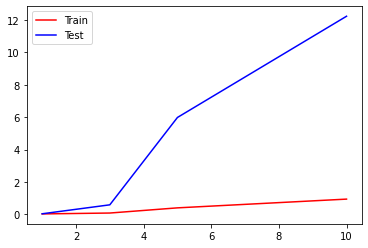

In [21]:
import matplotlib.pyplot as plt

plt.plot(g, err_train, 'r',label="Train") 
plt.plot(g, err_test, 'b',label="Test")
plt.legend(loc="best")
plt.show()